In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
from functools import partial

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [5]:
from metal.mmtl.metal_model import MetalModel
from metal.mmtl.slicing.slice_model import SliceModel
from metal.mmtl.trainer import MultitaskTrainer
from metal.mmtl.slicing.synthetics.mmtl_utils import create_tasks, create_payloads
from metal.mmtl.slicing.synthetics.data_generator import generate_data, get_circle_mask
from metal.mmtl.slicing.synthetics.viz import visualize_payload, visualize_predictions, visualize_attention

In [6]:
from metal.utils import set_seed

seed = 444
set_seed(seed)

In [7]:
# targets all the data -- used to add the BASE labelset to payloads
identity_fn = lambda x: np.ones(x.shape[0], dtype=np.bool)
# NOTE: the slice function _imperfectly_ targets the critical slice area.
critical_slice_fn = partial(get_circle_mask, center=(0.35, -0.1), radius=0.2)

### Generate Synthetic Dataset
We aim to build a dataset with a linear decision boundary and an abnormal boundary around $x=0.3, y=0$.
We define this slice as our `critical_region`.

In [8]:
decision_boundary_flip = partial(get_circle_mask, center=(0.25, 0), radius=0.2)
uid_lists, Xs, Ys = generate_data(N=5000, decision_boundary_flip=decision_boundary_flip)
task_name = "test_task"

#### Generate eval payload over the `critical_slice`

In [9]:
eval_payload = create_payloads(task_name, uid_lists, Xs, Ys, batch_size=4, 
   slice_funcs={"critical_slice": critical_slice_fn}
)[2] # take test set

Vizualizing labelset_gold from payload_test...


/Users/vincentchen/miniconda3/envs/mmtl/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


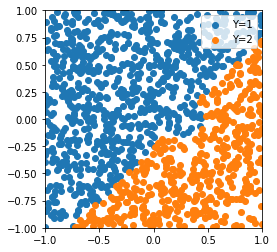

Vizualizing labelset:critical_slice:ind from payload_test...


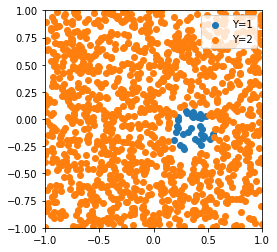

Vizualizing labelset:critical_slice:pred from payload_test...


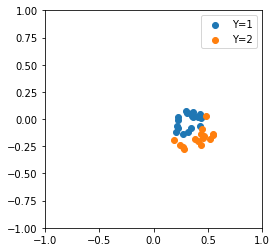

In [10]:
visualize_payload(eval_payload)

### Create tasks and payloads

In [11]:
# all models to test to test
model_configs = {
    'soft_param': {
        'slice_funcs': {"critical_slice": critical_slice_fn, "BASE": identity_fn},
        'model_class': SliceModel   
    },
#     'hard_param': {
#         'slice_funcs': {"critical_slice": critical_slice_fn, "BASE": identity_fn},
#         'model_class': MetalModel
#     },
#     'naive': {
#         'slice_funcs': {},
#         'model_class': MetalModel   
#     },
}

==========Initializing + Training soft_param==========
Creating 5 tasks...
BinaryClassificationTask(name=test_task, loss_multiplier=1.00, slice_head_type=None)
BinaryClassificationTask(name=test_task:critical_slice:pred, loss_multiplier=0.25, slice_head_type=pred)
BinaryClassificationTask(name=test_task:critical_slice:ind, loss_multiplier=0.25, slice_head_type=ind)
BinaryClassificationTask(name=test_task:BASE:pred, loss_multiplier=0.25, slice_head_type=pred)
BinaryClassificationTask(name=test_task:BASE:ind, loss_multiplier=0.25, slice_head_type=ind)
Creating 3 payloads...
Payload(payload_train: labels_to_tasks=[{'labelset_gold': 'test_task', 'labelset:critical_slice:ind': 'test_task:critical_slice:ind', 'labelset:critical_slice:pred': 'test_task:critical_slice:pred', 'labelset:BASE:ind': 'test_task:BASE:ind', 'labelset:BASE:pred': 'test_task:BASE:pred'}], split=train)
Payload(payload_valid: labels_to_tasks=[{'labelset_gold': 'test_task', 'labelset:critical_slice:ind': 'test_task:critic

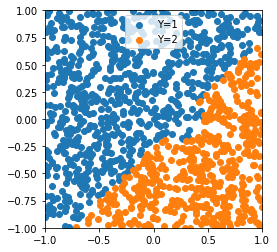

Vizualizing labelset:critical_slice:ind from payload_valid...


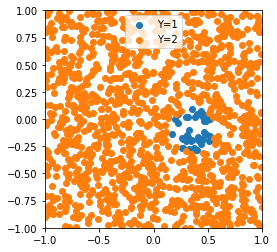

Vizualizing labelset:critical_slice:pred from payload_valid...


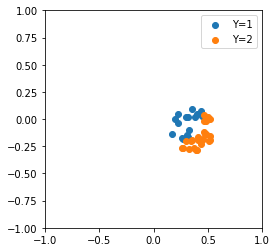

Vizualizing labelset:BASE:ind from payload_valid...


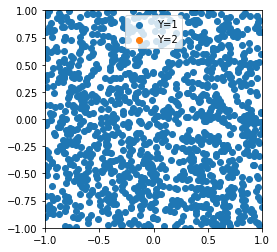

Vizualizing labelset:BASE:pred from payload_valid...


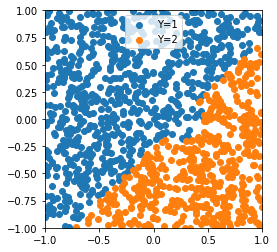

No cuda device available. Using cpu instead.

Network architecture:
SliceModel(
  (input_modules): ModuleDict(
    (test_task): DataParallel(
      (module): MetalModuleWrapper(
        (module): Sequential(
          (0): Linear(in_features=2, out_features=5, bias=True)
          (1): ReLU()
        )
      )
    )
    (test_task:BASE:ind): DataParallel(
      (module): MetalModuleWrapper(
        (module): Sequential(
          (0): Linear(in_features=2, out_features=5, bias=True)
          (1): ReLU()
        )
      )
    )
    (test_task:BASE:pred): DataParallel(
      (module): MetalModuleWrapper(
        (module): Sequential(
          (0): Linear(in_features=2, out_features=5, bias=True)
          (1): ReLU()
        )
      )
    )
    (test_task:critical_slice:ind): DataParallel(
      (module): MetalModuleWrapper(
        (module): Sequential(
          (0): Linear(in_features=2, out_features=5, bias=True)
          (1): ReLU()
        )
      )
    )
    (test_task:critical

[8.0 epo]: test_task:[payload_train/labelset_gold/loss=7.24e-02, payload_valid/labelset_gold/accuracy=9.82e-01] test_task:critical_slice:ind:[payload_train/labelset:critical_slice:ind/loss=2.32e-02, payload_valid/labelset:critical_slice:ind/accuracy=9.67e-01] test_task:BASE:ind:[payload_train/labelset:BASE:ind/loss=6.04e-06, payload_valid/labelset:BASE:ind/accuracy=1.00e+00] test_task:BASE:pred:[payload_train/labelset:BASE:pred/loss=1.62e-02, payload_valid/labelset:BASE:pred/accuracy=9.83e-01] test_task:critical_slice:pred:[payload_train/labelset:critical_slice:pred/loss=1.07e-01, payload_valid/labelset:critical_slice:pred/accuracy=8.78e-01] model:[train/all/loss=2.85e-02, train/all/lr=1.00e-02]
[9.0 epo]: test_task:[payload_train/labelset_gold/loss=7.09e-02, payload_valid/labelset_gold/accuracy=9.80e-01] test_task:critical_slice:ind:[payload_train/labelset:critical_slice:ind/loss=2.28e-02, payload_valid/labelset:critical_slice:ind/accuracy=9.67e-01] test_task:BASE:ind:[payload_train/l

[20.0 epo]: test_task:[payload_train/labelset_gold/loss=6.11e-02, payload_valid/labelset_gold/accuracy=9.81e-01] test_task:critical_slice:ind:[payload_train/labelset:critical_slice:ind/loss=1.26e-02, payload_valid/labelset:critical_slice:ind/accuracy=9.74e-01] test_task:BASE:ind:[payload_train/labelset:BASE:ind/loss=2.07e-07, payload_valid/labelset:BASE:ind/accuracy=1.00e+00] test_task:BASE:pred:[payload_train/labelset:BASE:pred/loss=1.60e-02, payload_valid/labelset:BASE:pred/accuracy=9.80e-01] test_task:critical_slice:pred:[payload_train/labelset:critical_slice:pred/loss=1.02e-01, payload_valid/labelset:critical_slice:pred/accuracy=9.27e-01] model:[train/all/loss=2.30e-02, train/all/lr=1.00e-02]
[21.0 epo]: test_task:[payload_train/labelset_gold/loss=6.01e-02, payload_valid/labelset_gold/accuracy=9.81e-01] test_task:critical_slice:ind:[payload_train/labelset:critical_slice:ind/loss=1.12e-02, payload_valid/labelset:critical_slice:ind/accuracy=9.78e-01] test_task:BASE:ind:[payload_train

In [12]:
%%time
trained_models = {}
for model_name, config in model_configs.items():
    print(f"{'='*10}Initializing + Training {model_name}{'='*10}")
    slice_funcs = config['slice_funcs']
    model_class = config['model_class']
    tasks = create_tasks(task_name, slice_names=list(slice_funcs.keys()), verbose=True)
    payloads = create_payloads(task_name, uid_lists, Xs, Ys, batch_size=4, slice_funcs=slice_funcs, verbose=True)
    visualize_payload(payloads[1])

    # DEBUGGING
    model = model_class(tasks, verbose=True, seed=seed)
    trainer = MultitaskTrainer(verbose=True, lr=0.01, seed=seed)
    metrics_dict = trainer.train_model(
        model, payloads, n_epochs=30, verbose=True
    )
    print(metrics_dict)
          
    trained_models[model_name] = model

### DEBUG: Evaluate labelsets on the task heads they were trained on
to confirm whether they are learning in the first place!

In [13]:
# trained_models['hard_param'].score(payloads[2])

In [14]:
# visualize_predictions(trained_models['hard_param'], payloads[2])

In [15]:
# trained_models['soft_param'].score(payloads[2])

In [16]:
# visualize_predictions(trained_models['soft_param'], payloads[2])

## Evaluate Model
**NOTE**: Ensure that slice labelsets are evaluated on the primary task head.

In [17]:
test_labelsets = eval_payload.labels_to_tasks.keys()
for label_name in test_labelsets:
    eval_payload.retarget_labelset(label_name, task_name)

label_set labelset_gold now points to task test_task (originally, test_task).
label_set labelset:critical_slice:ind now points to task test_task (originally, test_task:critical_slice:ind).
label_set labelset:critical_slice:pred now points to task test_task (originally, test_task:critical_slice:pred).


==========Evaluating soft_param==========
{   'test_task/payload_test/labelset:critical_slice:ind/accuracy': 0.3728,
    'test_task/payload_test/labelset:critical_slice:pred/accuracy': 0.8529411764705882,
    'test_task/payload_test/labelset_gold/accuracy': 0.984}
Vizualizing test_task predictions on labelset_gold...


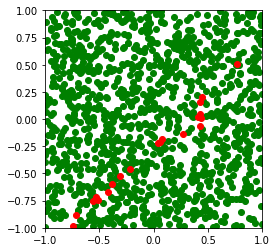

Vizualizing test_task predictions on labelset:critical_slice:ind...


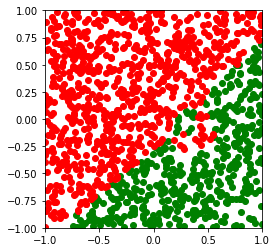

Vizualizing test_task predictions on labelset:critical_slice:pred...


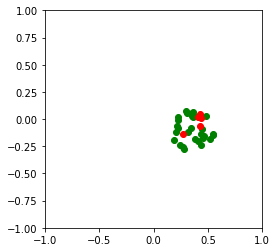

In [18]:
for model_name in model_configs.keys():
    print(f"{'='*10}Evaluating {model_name}{'='*10}")
    pp.pprint(trained_models[model_name].score(eval_payload))
    visualize_predictions(trained_models[model_name], eval_payload)

## Visualize Attention Weights of `soft_param`

Vizualizing test_task:BASE:ind attention on labelset_gold...


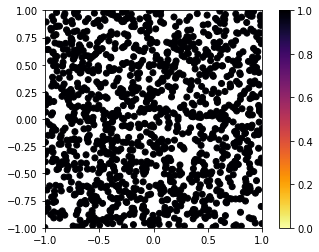

Vizualizing test_task:critical_slice:ind attention on labelset_gold...


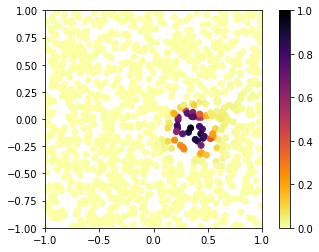

Vizualizing test_task:BASE:ind attention on labelset:critical_slice:ind...


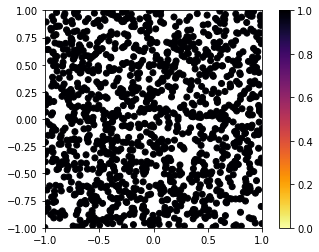

Vizualizing test_task:critical_slice:ind attention on labelset:critical_slice:ind...


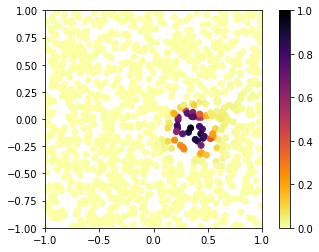

Vizualizing test_task:BASE:ind attention on labelset:critical_slice:pred...


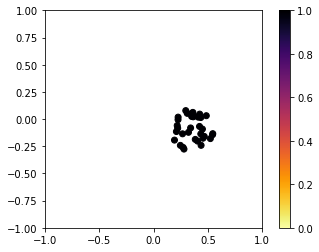

Vizualizing test_task:critical_slice:ind attention on labelset:critical_slice:pred...


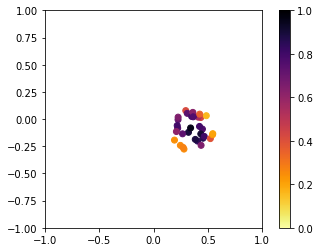

Vizualizing test_task:BASE:ind attention on labelset:BASE:ind...


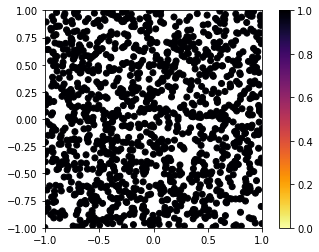

Vizualizing test_task:critical_slice:ind attention on labelset:BASE:ind...


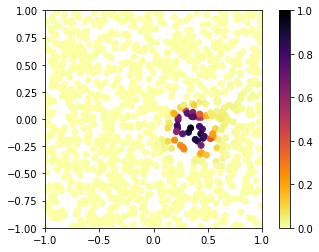

Vizualizing test_task:BASE:ind attention on labelset:BASE:pred...


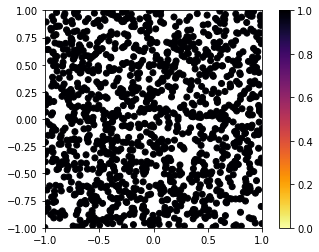

Vizualizing test_task:critical_slice:ind attention on labelset:BASE:pred...


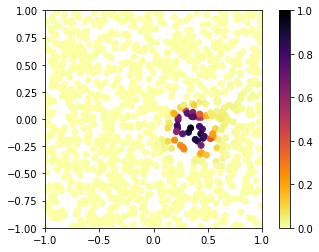

In [26]:
visualize_attention(trained_models['soft_param'], payloads[2])

### DEBUG: how often does attention choose the slice_head + we are actually in the slice?

In [29]:
from torch.nn import functional as F
payload = eval_payload
model = trained_models['soft_param']
slice_task_names = sorted(
    [slice_task_name for slice_task_name in model.slice_ind_tasks.keys()]
)

Ys, A_weights = model.attention_with_gold(payload)
X = np.array(payload.data_loader.dataset.X_dict["data"])
weights = F.softmax(torch.tensor(A_weights), dim=1).numpy()
# weights = np.array(A_weights)

In [31]:
from scipy.special import expit

In [32]:
expit(np.array(A_weights))

array([[1.0000000e+00, 1.9594350e-07],
       [1.0000000e+00, 3.3916067e-19],
       [1.0000000e+00, 2.0104048e-18],
       ...,
       [1.0000000e+00, 1.5697570e-21],
       [1.0000000e+00, 4.0998867e-11],
       [1.0000000e+00, 5.1285278e-12]], dtype=float32)

In [33]:
slice_mask = critical_slice_fn(X)
slice_weights = weights[slice_mask]

In [42]:
# # when do we choose the slice head? 
# np.sum(slice_weights[:, 1] < slice_weights[:, 0]) / np.sum(slice_mask)